In [1]:
import cv2
import torch
from model import Model
from generate import generate
import matplotlib.pyplot as plt
from transformers import BertTokenizer, CLIPFeatureExtractor, CLIPVisionModel, logging

### 定义使用函数

In [2]:
def cap_img(img_path, model, tokenizer, feature_extractor, vision_model):
    model.eval()
    # 导入图片
    img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    print('你输入的图片: ')
    plt.imshow(img)
    plt.show()
    img = torch.from_numpy(img.transpose(2,0,1))
    
    # 图片预处理
    pixel_values = feature_extractor(img, return_tensors='pt')['pixel_values']
    img_feature = vision_model(pixel_values.to('cpu')).pooler_output.view(1, -1)

    # 生成文字
    print('生成的文字: ')
    model = model.cpu()
    out_text = generate(img_feature.to('cpu'), model, tokenizer, max_length=30, num_samples=20)
    
    for i, s in enumerate(out_text):
        print('第{}句：{}。'.format(i+1, s))

### 加载预训练模型

In [3]:
logging.set_verbosity_error()   # 消除未使用权重的warning

tokenizer = BertTokenizer.from_pretrained("uer/gpt2-chinese-cluecorpussmall")
feature_extractor = CLIPFeatureExtractor.from_pretrained("openai/clip-vit-large-patch14")
vision_model = CLIPVisionModel.from_pretrained("openai/clip-vit-large-patch14").to('cpu')

### 加载训练好的ClipCap模型

In [4]:
clipcap = torch.load('./models/clipcap_mlp_finetune.model')

### 使用

你输入的图片: 


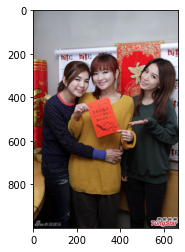

生成的文字: 
第1句：房屋里有两个面带微笑的女人和一个右手拿着纸的女人搂在一起。
第2句：两个手上拿着同一个牌子的女人和一个穿着黑色上衣的女人站在房间。
第3句：亮堂的房间里站着三个拿着同一个东西的女人。
第4句：屋子里有三个面带微笑的女人共同拿着一个东西。
第5句：两个面带微笑的女人和一个抬起右手拿着牌子的女人共同拿着一个证。


In [5]:
cap_img('./test_images/SHE.jpg', clipcap, tokenizer, feature_extractor, vision_model)